<a href="https://colab.research.google.com/github/Donets-Yuliya/DataScience/blob/main/HomeWork5/HomeWork5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [1]:
#Установка библиотеки Kaggle
!pip install kaggle

In [2]:
from google.colab import files

# Загрузка файла kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import os
import shutil

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [4]:
# Kaggle API для загрузки датасета:
!kaggle datasets download -d abdallaahmed77/healthcare-risk-factors-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset
License(s): CC0-1.0
  0% 0.00/1.28M [00:00<?, ?B/s]
100% 1.28M/1.28M [00:00<00:00, 692MB/s]


In [5]:
# Распаковка архива:
import zipfile

with zipfile.ZipFile('healthcare-risk-factors-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import pandas as pd

# Загрузка файла в датасет
df = pd.read_csv('dirty_v3_path.csv')

# Просматриваем первые несколько строк датасета
print(df.head())

    Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0  46.0    Male          Diabetes   137.04          135.27  28.90   
1  22.0    Male           Healthy    71.58          113.27  26.29   
2  50.0     NaN            Asthma    95.24             NaN  22.53   
3  57.0     NaN           Obesity      NaN          130.53  38.47   
4  66.0  Female      Hypertension    95.15          178.17  31.12   

   Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
0              96.04             6       231.88         210.56   7.61   
1              97.54             2       165.57         129.41   4.91   
2              90.31             2       214.94         165.35   5.60   
3              96.60             5       197.71         182.13   6.92   
4              94.90             4       259.53         115.85   5.98   

   Smoking  Alcohol  Physical Activity  Diet Score  Family History  \
0        0        0              -0.20        3.54               0   
1     

In [7]:
# Выводим статистические данные о числовых столбцах
print(df.describe())

                Age       Glucose  Blood Pressure           BMI  \
count  25500.000000  25500.000000    25500.000000  30000.000000   
mean      54.616784    123.622179      140.455337     28.476155   
std       15.973618     41.576943       21.077933      5.728804   
min       10.000000     20.320000       74.240000      7.670000   
25%       45.000000     96.280000      125.140000     24.590000   
50%       55.000000    110.500000      138.320000     28.050000   
75%       66.000000    136.610000      153.790000     31.810000   
max       89.000000    318.510000      226.380000     56.850000   

       Oxygen Saturation  LengthOfStay   Cholesterol  Triglycerides  \
count       30000.000000  30000.000000  30000.000000   30000.000000   
mean           94.954992      4.414133    213.033891     176.837375   
std             3.736202      2.761536     33.519757      48.812827   
min            67.510000      1.000000     95.730000     -22.480000   
25%            93.000000      3.000000   

In [8]:
# Получаем общую информацию о датасете
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

Предобработка данных

In [9]:
# Удаляем колонки random_notes, noise_col из-за неинформативности
df = df.drop(columns=['random_notes', 'noise_col'])

# В датасете присутствуют пустые значения в некоторых колонках, но т.к. записей много (30000), то можно просто удалить строки с пропусками
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Medical Condition'], inplace=True)
df.dropna(subset=['Glucose'], inplace=True)
df.dropna(subset=['Blood Pressure'], inplace=True)

In [10]:
# Проверяем, сколько осталось строк и удалились ли пустые
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13355 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                13355 non-null  float64
 1   Gender             13355 non-null  object 
 2   Medical Condition  13355 non-null  object 
 3   Glucose            13355 non-null  float64
 4   Blood Pressure     13355 non-null  float64
 5   BMI                13355 non-null  float64
 6   Oxygen Saturation  13355 non-null  float64
 7   LengthOfStay       13355 non-null  int64  
 8   Cholesterol        13355 non-null  float64
 9   Triglycerides      13355 non-null  float64
 10  HbA1c              13355 non-null  float64
 11  Smoking            13355 non-null  int64  
 12  Alcohol            13355 non-null  int64  
 13  Physical Activity  13355 non-null  float64
 14  Diet Score         13355 non-null  float64
 15  Family History     13355 non-null  int64  
 16  Stress Level       13355 no

In [11]:
# Визуализация фактических и предсказанных значений
import matplotlib.pyplot as plt

def visual():
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(y_test[:100])), y_test[:100], color='blue', label='Фактические значения')
  plt.scatter(range(len(y_test[:100])), y_pred[:100], color='red', label='Предсказанные значения')

  plt.xticks(range(0, 100, 10))
  plt.yticks(range(0, 20, 1))

  plt.xlabel('Номер строки')
  plt.ylabel('Значение')
  plt.title('Фактические и предсказанные значения')
  plt.legend()
  plt.show()

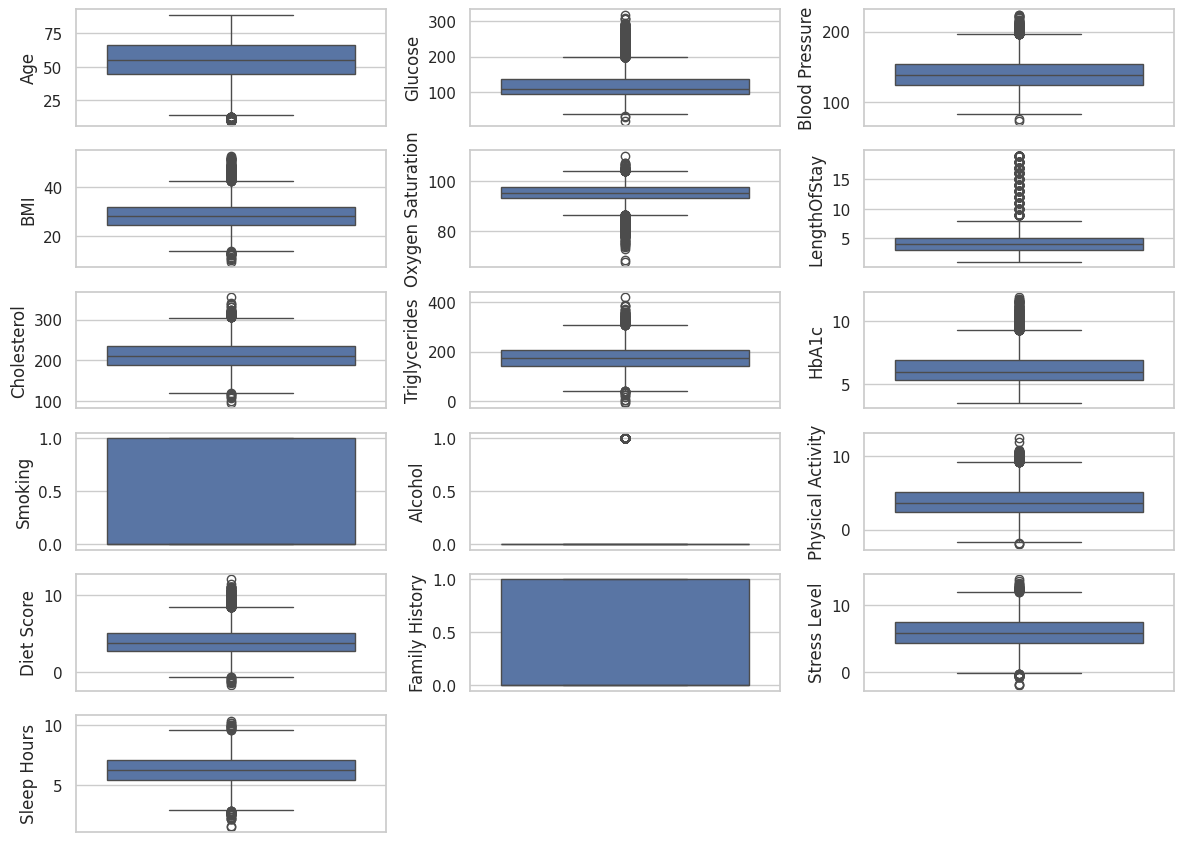

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Визуализация ящик с усами
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Перебираем каждый числовой столбец и создаем для него ящик с усами
for index, column in enumerate(df.select_dtypes(include=[np.number]).columns):
  plt.subplot((len(df.columns) // 3) + 1, 3, index + 1)
  sns.boxplot(y=df[column])

plt.tight_layout()
plt.show()

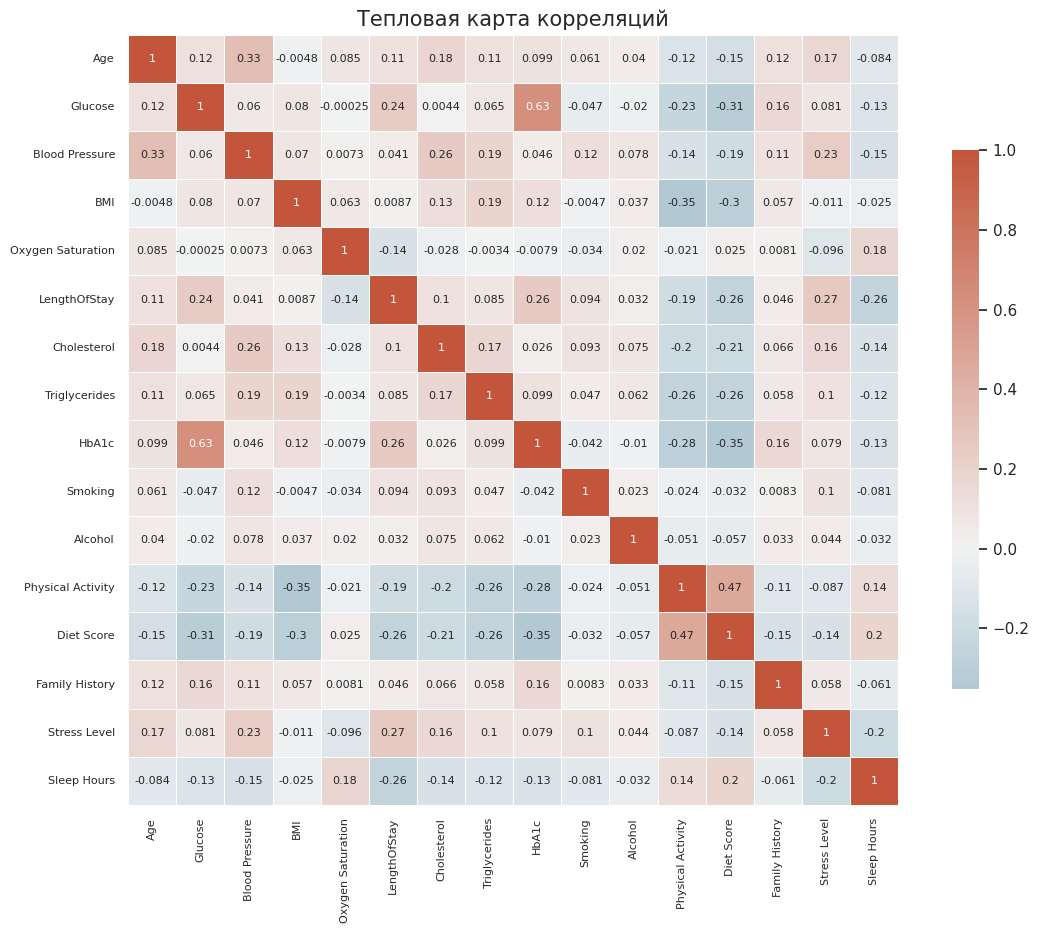

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Тепловая карта
numeric_df = df.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
corr = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(14, 10))
plt.title('Тепловая карта корреляций', fontsize=15)

sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, annot=True,
            annot_kws={"size": 8})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Определяем категориальные и числовые признаки, а также целевую переменную

numeric_features = ['Age', 'Glucose', 'Blood Pressure', 'Cholesterol', 'Triglycerides', 'HbA1c', 'Physical Activity', 'Diet Score', 'Stress Level', 'Sleep Hours']
categorical_features = ['Gender', 'Medical Condition', 'Smoking', 'Alcohol', 'Family History']
target_column = 'LengthOfStay' # будем предсказывать количество дней пребывания в больнице

# Создание препроцессора
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

X = df.drop(columns=[target_column])
y = df[target_column]

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

# Получаем наименование колонок после OneHotEncoder
onehot_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_features + onehot_cols.tolist()

X_train = pd.DataFrame(X_train_p, columns=feature_names)
X_test = pd.DataFrame(X_test_p, columns=feature_names)

GradientBoosting

In [15]:
# GradientBoosting
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.03, max_depth=5, subsample=0.7, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)
y_pred = np.round(y_pred) # Округляем значение, т.к. количество дней - это целое значение

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'-----------------')
print(f'Метрики качества:')
print(f'-----------------')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

-----------------
Метрики качества:
-----------------
MAE: 1.2606
MSE: 2.6443
RMSE: 1.6261
R²: 0.6619


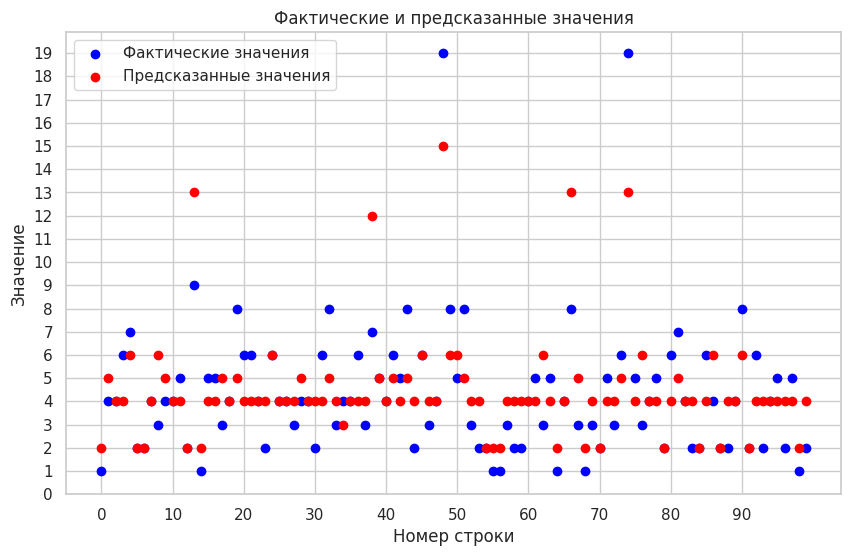

In [16]:
visual()

In [17]:
# Определение важности признаков

importances = model.feature_importances_

# Создаем датафрейм с важностю признаков
feature_importance = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feature_importance.sort_values(by='Важность', ascending=False, inplace=True)

print("\nВажность признаков:")
print(feature_importance)


Важность признаков:
                           Признак  Важность
12        Medical Condition_Cancer  0.630616
14       Medical Condition_Healthy  0.159747
13      Medical Condition_Diabetes  0.099732
2                   Blood Pressure  0.013470
6                Physical Activity  0.012447
3                      Cholesterol  0.011605
7                       Diet Score  0.011603
9                      Sleep Hours  0.010848
8                     Stress Level  0.009624
1                          Glucose  0.009442
5                            HbA1c  0.007841
0                              Age  0.006728
4                    Triglycerides  0.006415
15  Medical Condition_Hypertension  0.002726
11        Medical Condition_Asthma  0.002447
17                       Smoking_1  0.001744
16       Medical Condition_Obesity  0.001292
18                       Alcohol_1  0.000744
19                Family History_1  0.000650
10                     Gender_Male  0.000280


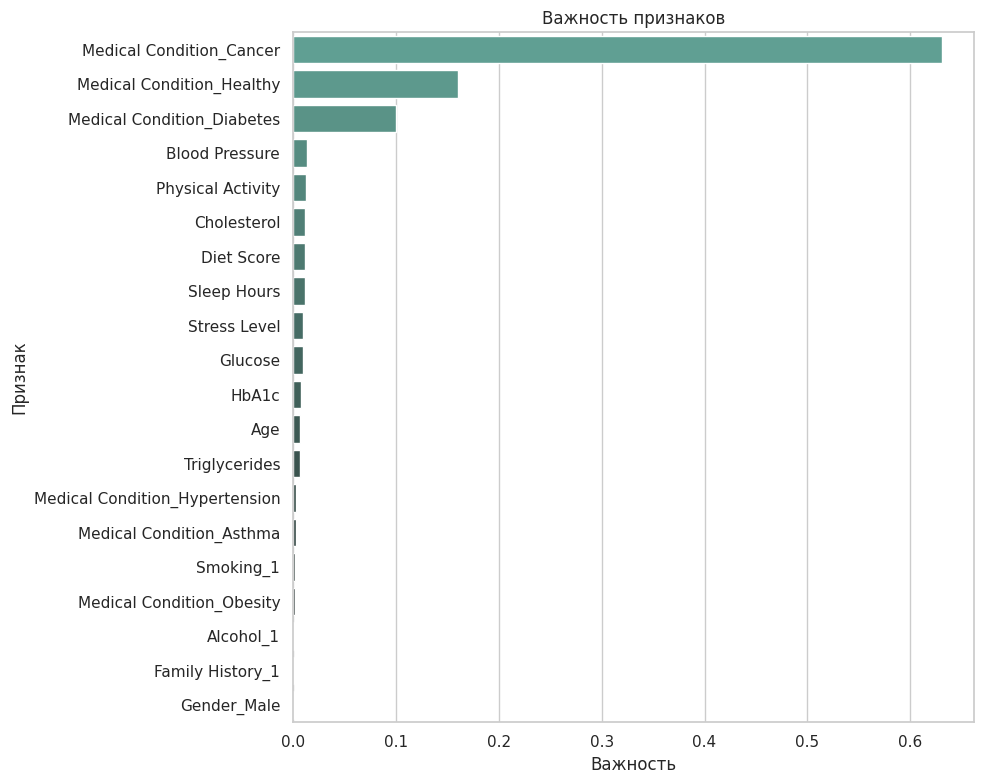

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Рисуем визуализацию с важностью признаков
plt.figure(figsize=(10,8))
sns.barplot(x='Важность', y='Признак', hue='Признак', data=feature_importance, palette='dark:#5A9_r')
plt.title('Важность признаков')
plt.tight_layout()
plt.show()

LGBMRegressor

In [19]:
# Оставляем только важные признаки
imp_features = ['Medical Condition_Cancer', 'Medical Condition_Healthy', 'Medical Condition_Diabetes', 'Blood Pressure', 'Physical Activity']
X_train_imp = X_train[imp_features]
X_test_imp = X_test[imp_features]

In [20]:
# LGBMRegressor
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [140, 150, 160],
    'learning_rate': [0.02, 0.025, 0.03],
    'max_depth': [4, 5, 6],
    'min_child_samples': [110, 120, 130]
}

model = LGBMRegressor(random_state=42, verbose=-1, reg_alpha=0.1, reg_lambda=0.1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

grid_search.fit(X_train_imp, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test_imp)
y_pred = np.round(y_pred)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'-----------------')
print(f'Метрики качества:')
print(f'-----------------')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

Лучшие параметры: {'learning_rate': 0.025, 'max_depth': 5, 'min_child_samples': 130, 'n_estimators': 150}
-----------------
Метрики качества:
-----------------
MAE: 1.2606
MSE: 2.6428
R²: 0.6621


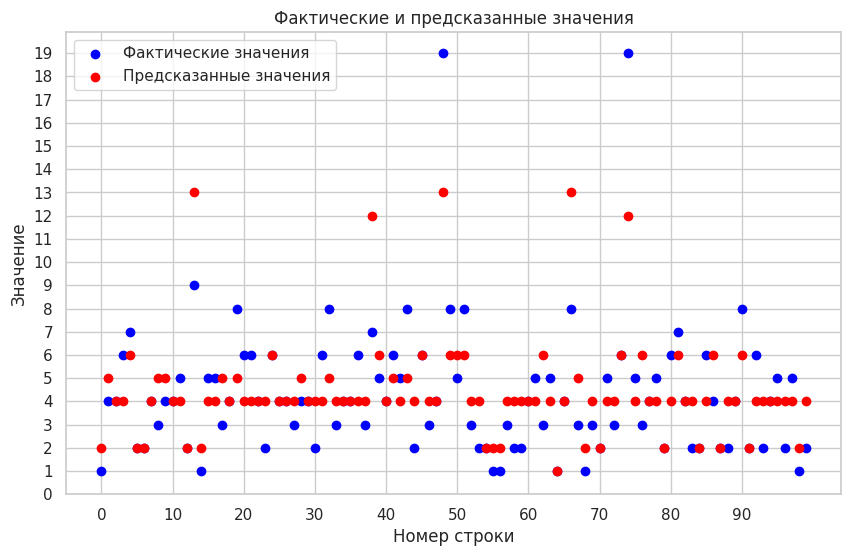

In [21]:
visual()

RandomForestRegressor

In [22]:
# RandomForestRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 350, 400],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

rfr = RandomForestRegressor(random_state=42, n_jobs=-1, max_features='sqrt')
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

grid_search.fit(X_train_imp, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test_imp)
y_pred = np.round(y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'-----------------')
print(f'Метрики качества:')
print(f'-----------------')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 350}
-----------------
Метрики качества:
-----------------
MAE: 1.2722
MSE: 2.6806
RMSE: 1.6373
R²: 0.6573


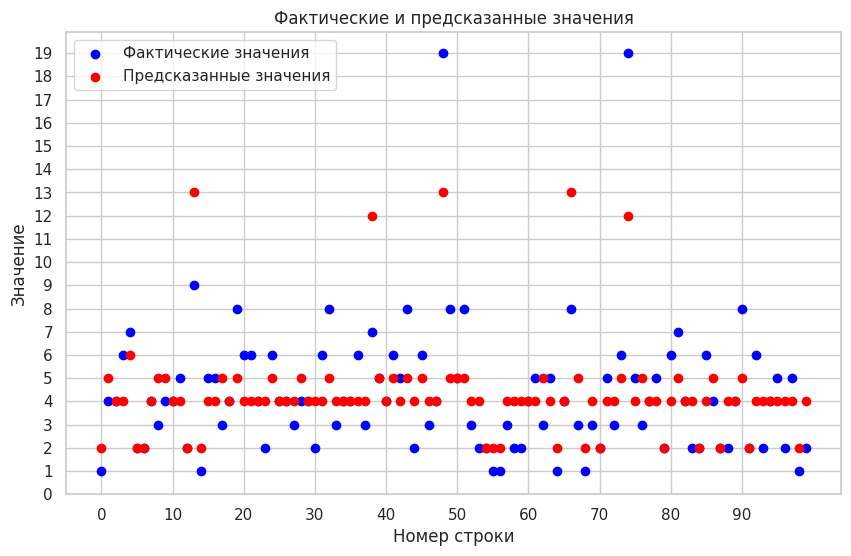

In [23]:
visual()

ExtraTreesRegressor

In [24]:
# ExtraTreesRegressor
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [180, 200, 250],
    'max_depth': [7, 8, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 0.6, 0.7],
    'bootstrap': [True]
}

etr = ExtraTreesRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)

grid_search.fit(X_train_imp, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test_imp)
y_pred = np.round(y_pred)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f'-----------------')
print(f'Метрики качества:')
print(f'-----------------')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

Лучшие параметры: {'bootstrap': True, 'max_depth': 8, 'max_features': 0.6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
-----------------
Метрики качества:
-----------------
MAE: 1.2613
MSE: 2.6121
RMSE: 1.6162
R²: 0.6660


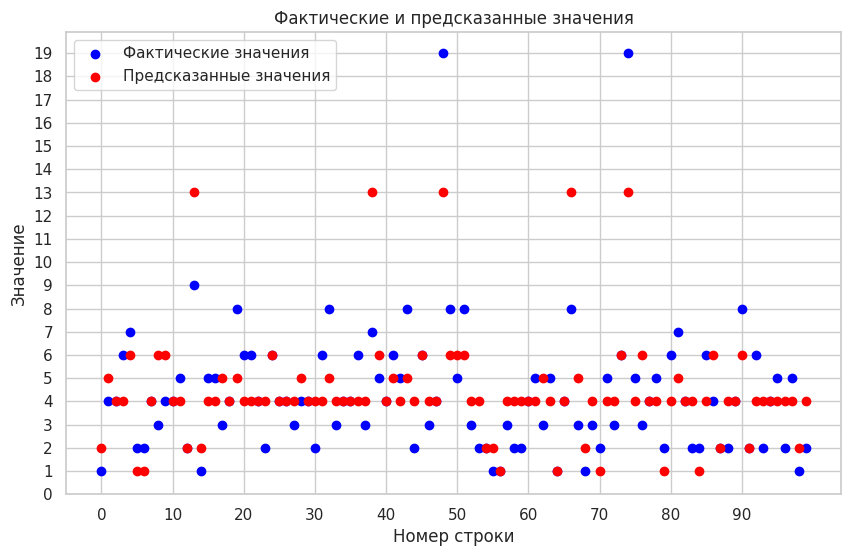

In [25]:
visual()

CatBoost

In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделение данных на обучающий и тестовый наборы
# Не делаю предварительную обработку категориальных признаков, т.к. CatBoost имеет встроенную обработку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'iterations': [100, 150],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 4, 5],
    'depth': [7]
}

regressor = CatBoostRegressor(random_state=42, verbose=0, loss_function='RMSE')
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train, cat_features=categorical_features)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f'-----------------')
print(f'Метрики качества:')
print(f'-----------------')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

Лучшие параметры: {'depth': 7, 'iterations': 100, 'l2_leaf_reg': 4, 'learning_rate': 0.05}
-----------------
Метрики качества:
-----------------
MAE: 1.2449
MSE: 2.6054
RMSE: 1.6141
R²: 0.6669


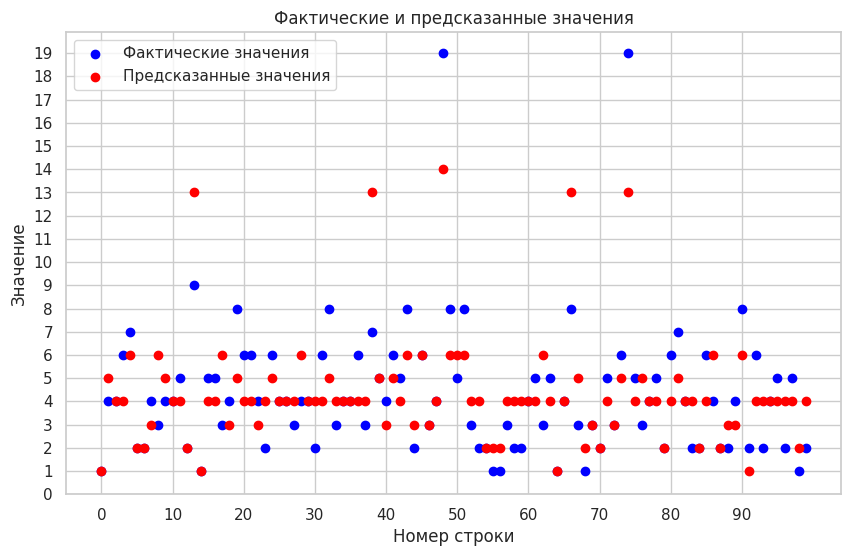

In [28]:
visual()

Итоговые выводы

Все модели показывают не очень высокую точность (от 0,6573 до 0,6669). Из выбранных регрессоров наилучшую точность показывает CatBoostRegressor (0.6669), на следующем месте ExtraTreesRegressor (0.6660).